<a href="https://colab.research.google.com/github/DWA-GIT/TESI-UNIFACISA/blob/master/Classificacao_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

uri = "https://raw.githubusercontent.com/DWA-GIT/TESI-UNIFACISA/master/car-prices.csv"

dados = pd.read_csv(uri)

dados.head()


In [5]:
renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year': "ano_modelo",
    'price' : "preco",
    'sold' : "vendido"  
    
}

dados = dados.rename(columns=renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [6]:
trocar = {
    'no' : 0,
    'yes': 1    
}

dados.vendido = dados.vendido.map(trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [0]:
from datetime import datetime

ano_atual = datetime.today().year

ano_atual

In [0]:
dados['idade_do_modelo'] = ano_atual - dados.ano_modelo

dados.head()

In [0]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

In [0]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_modelo"], axis=1)

dados.head()

In [21]:
X = dados[["preco", "idade_do_modelo", "km_por_ano"]]
Y = dados [["vendido"]]

X.shape
Y.shape

(10000, 1)

In [27]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5

np.random.seed(SEED)

treino_X, teste_X, treino_Y, teste_Y = train_test_split (X, Y, test_size=0.25, stratify=Y)

print("Treinaremos com %d elementos e testaremos com %d elementos"  % ( len(treino_X), len(teste_X) ) )



Treinaremos com 7500 elementos e testaremos com 2500 elementos


In [31]:
modelo = LinearSVC()
modelo.fit(treino_X, treino_Y)
previsoes = modelo.predict(teste_X)
acuracia = accuracy_score(teste_Y, previsoes) * 100
print("A minha acuracia foi de %d "% acuracia )

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A minha acuracia foi de 57 


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [32]:
from sklearn.dummy import DummyClassifier

modelo = DummyClassifier()
modelo.fit(treino_X, treino_Y)
previsoes = modelo.predict(teste_X)
acuracia = accuracy_score(teste_Y, previsoes) * 100
print("A minha acuracia foi de %d "% acuracia )

A minha acuracia foi de 50 


In [39]:
modelo = DummyClassifier(strategy='stratified', random_state=None, constant=None)
modelo.fit(treino_X, treino_Y)
previsoes = modelo.predict(teste_X)
acuracia = accuracy_score(teste_Y, previsoes) * 100
print("A minha acuracia foi de %d "% acuracia )

A minha acuracia foi de 52 


In [48]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_X, treino_Y)
previsoes = modelo.predict(teste_X)
acuracia = accuracy_score(teste_Y, previsoes) * 100
print("A minha acuracia foi de %d "% acuracia )



A minha acuracia foi de 79 


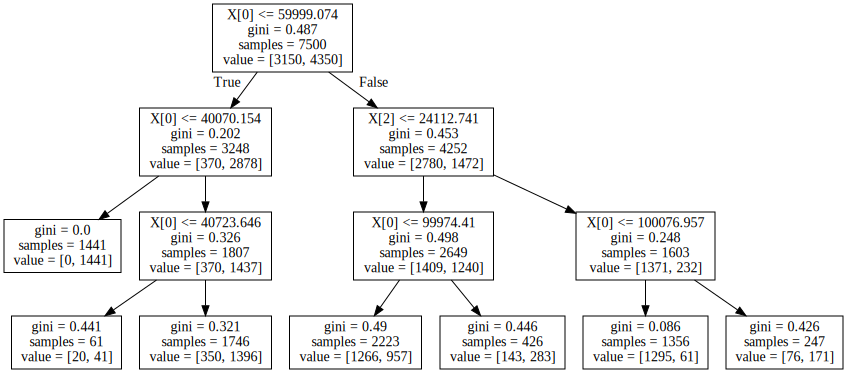

In [49]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(modelo, out_file=None)
grafico = graphviz.Source(dot_data)
grafico

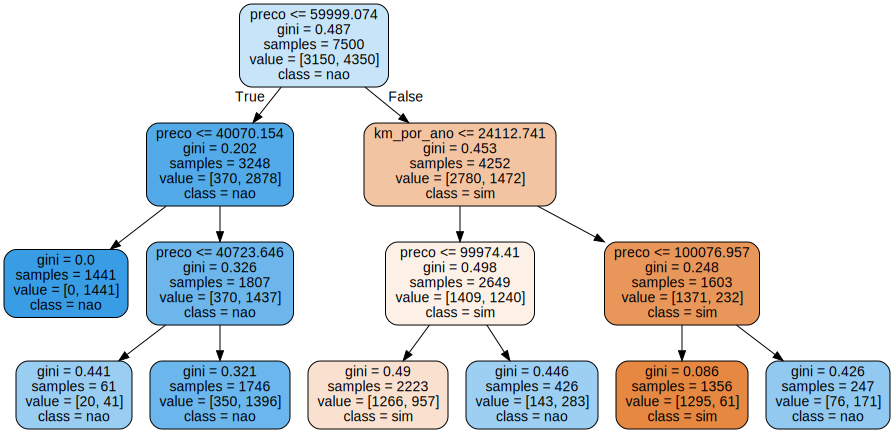

In [50]:
import graphviz

features = X.columns
dot_data = export_graphviz(modelo, out_file=None,
                          filled = True, rounded = True,
                          feature_names = features, 
                          class_names = ["sim", "nao"])
grafico = graphviz.Source(dot_data)
grafico 

